<a href="https://colab.research.google.com/github/AditMeh/Reinforcement-Learning/blob/main/k_armed_bandit_experiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook is to test out the various k-armed bandit methods presented in sutton and barto chapter 2 on a size k testbed

In [199]:
import numpy as np

class TestBed():
    def __init__(self, k, var):
        self.testbed = {}

        for q_star in range(k):
            self.testbed[q_star] = np.random.normal(loc = 0, scale=var, size = 1)[0]
    
    def compute_reward(self, action):
        return np.random.normal(self.testbed[action], 1, 1)[0]


class Bandit():
    def __init__(self, k, epsilon):
        self.action_values = {i: 0 for i in range(k)}
        self.epsilon = epsilon
        self.k = k
        self.num_action = {i: 0 for i in range(k)}

    def select_action(self):
        decision = np.random.randint(0, 101, 1)

        # Greedily select action
        if decision > 100*self.epsilon:
            action_space = np.asarray([self.action_values[i] for i in range(self.k)])
            action = np.random.choice(np.flatnonzero(action_space == action_space.max()))
            self.num_action[action] += 1
        # Randomly select action (exploration)
        else:
            action = np.random.choice([i for i in range(self.k)], 1)[0]
            self.num_action[action] += 1

        return action

    def update_action_values(self, reward, action):
        self.action_values[action] = self.action_values[action] + (1/self.num_action[action])*(reward - self.action_values[action])

In [202]:
def run_experiment(steps, k, epsilon, runs):

    reward_list = [[0] for _ in range(runs)]
    for j in range(runs):
        testbed = TestBed(k, 1)
        bandit = Bandit(k, epsilon)

        for i in range(steps):
            action = bandit.select_action()
            reward = testbed.compute_reward(action)
            reward_list[j].append(reward)
            bandit.update_action_values(reward, action)
    return [(sum([reward_list[i][k] for i in range(steps)])/runs) for k in range(steps)]

reward_list = run_experiment(2000, 10, 0.50, 2000)



Using matplotlib backend: agg


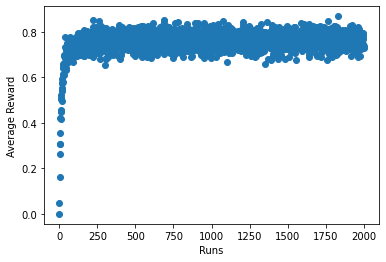

In [210]:
%matplotlib
import matplotlib.pyplot as plt
plt.scatter(list(range(2000)), reward_list)
plt.xlabel("Runs")
plt.ylabel("Average Reward")
plt.show()